#### A 2D radial (disk) simulation

In [1]:
include("../resk.jl")
include("../reskplots.jl")

RESK successfully loaded.
RESKPlots successfully loaded.


Check if a shorter version with the same parameters works:

In [2]:

aa = rangeexp_disk_inf(0,4,1; r_max_burnin=3, r_max_exp=100, data_to_generate="FP",capacity=100,prolif_rate=2,weightfitn=false,condsel=true,premutate=true,oneside=true,bottleneck=NaN,mut_rate=0.1,migr_rate=0.05,sel_coef=0.005,
    startfill_range=[(100+1-3):(100+1+3),(100+1-3):(100+1+3)])

0.13227200415132434
0.44255813473044037
0.6621572232730055
0.5439084844884171
0.6603270385623952
0.21662743707835308
0.8960523351619759
0.8337764978040415
0.0382499572412518
0.9530624049330573
0.3360700135014182
0.9768397531662034
0.9197248041459
0.7022490858620593
0.525245545097036
0.9708203635161666
0.3219326099173093
0.3281295342690086
0.9064011121349919
0.09035277560487442
0.5398774912768699
0.5768713627802806
0.7494117365699495
0.6167077143453971
0.013372106552820284
0.702870914547465
0.40094823533076807
0.885242600205136
0.9675934710300399
0.0976753853932052
0.8341945022391526
0.1378786108848744
0.3149130665996106
0.2678875670442775
0.3081567086215755
0.0717294549205666
0.21780243198291205
0.8068256089765504
0.08815729048237608
0.7247966992437104
0.9485832025665814
0.35904717623817617
0.7225510728849956
0.8771549071260275
0.23358088320200954
0.9411095483986194
0.6419129071784336
0.7542628132091302
0.7764265987536823
0.17890872815161551
0.33055159664437317
0.2020908520478688
0.967

Dict{String, Any} with 5 entries:
  "pops"  => Float32[NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN Na…
  "del"   => NaN
  "fitn"  => Float32[NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN Na…
  "stats" => Dict{String, Any}("wlddim"=>2, "max_burnin"=>NaN, "name"=>"2024-08…
  "ben"   => NaN

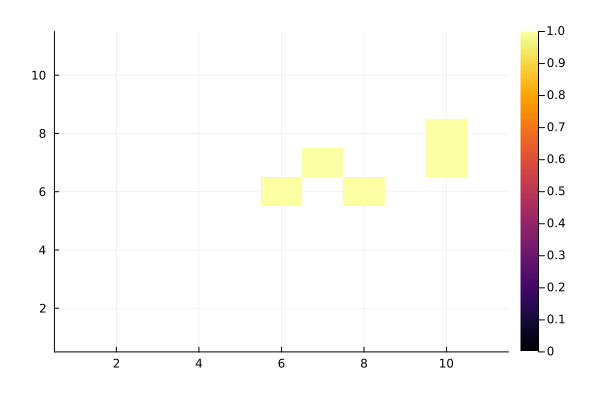

In [3]:
Plots.heatmap(aa["fitn"][95:105,95:105,1,1])

In [4]:
aa["fitn"][95:105,95:105,2,1]

11×11 Matrix{Float32}:
 NaN  NaN  NaN  NaN  NaN  NaN         …  NaN       NaN         NaN
 NaN  NaN  NaN  NaN  NaN  NaN            NaN       NaN         NaN
 NaN  NaN  NaN  NaN  NaN  NaN            NaN       NaN         NaN
 NaN  NaN  NaN  NaN  NaN  NaN            NaN       NaN         NaN
 NaN  NaN  NaN  NaN  NaN    1.0          NaN       NaN         NaN
 NaN  NaN  NaN  NaN  NaN    0.999578  …    1.0     NaN         NaN
 NaN  NaN  NaN  NaN  NaN    1.0            1.0       0.999175    1.0
 NaN  NaN  NaN  NaN  NaN  NaN              0.9975    0.999087    1.0
 NaN  NaN  NaN  NaN  NaN  NaN            NaN         0.996675  NaN
 NaN  NaN  NaN  NaN  NaN  NaN            NaN       NaN         NaN
 NaN  NaN  NaN  NaN  NaN  NaN         …  NaN       NaN         NaN

In [6]:
re_heatmap(aa, "pops", aa["stats"]["n_gens"]-33, aa["stats"]["n_gens"];size=(800,210),clim=(0.8,1.1))

This data was not generated.


In [5]:
aa["pops"][:,2019,1]

250×10×250×1 SharedArray{Float32, 4}:
[:, :, 1, 1] =
 NaN  NaN  NaN    NaN    121.0  NaN    NaN  NaN  NaN  103.0
 NaN  NaN  NaN    117.0  NaN    NaN    NaN  NaN  NaN  NaN
 NaN  NaN   93.0  NaN    NaN    117.0  NaN  NaN  NaN  NaN
 NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN
 NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN
 NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN
 NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN
 NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN
 NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN
 NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN
   ⋮                              ⋮                   
 NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN
 NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN
 NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN
 NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN
 NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN
 NaN  NaN  NaN    Na

In [2]:


function analyse(condsel)
    nm = condsel ? "condsel true" : "condsel false"
    re = rangeexp_1d_inf(1,1200,5;x_max_burnin=5,x_max_exp=500,data_to_generate="F",k_capacity=100,r_prolif_rate=2,weightfitn=false,condsel=condsel,name=nm,mut_rate=0.05,migr_rate=0.05,s_sel_coef=0.005)
    N_GENS = re["stats"]["n_gens"]

    re_fitn_frontav = average_front(re,"fitn";oneside=true)
    re_fitn_frontav_mean = timeseries_mean(re_fitn_frontav, N_GENS)
    re_fitnN = norm_onset_mean(re, "fitn")
    re_fitnN_frontav = average_front(re_fitnN, N_GENS, re["stats"]["max"][1]; oneside=true)
    re_fitnN_frontav_mean = timeseries_mean(re_fitnN_frontav, N_GENS)

    return re, re_fitn_frontav_mean, re_fitnN_frontav_mean
end

function heatcheck(a)
    re_heatmap(a, "fitn", a["stats"]["n_gens"]-150, a["stats"]["n_gens"])
end

function plotcheck(a)
    Plots.plot(a[2],xlabel="Generation",label=a[1]["stats"]["name"])
end
function plotcheck!(a)
    Plots.plot!(a[2],xlabel="Generation",label=a[1]["stats"]["name"])
end

plotcheck! (generic function with 1 method)

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_ArwbEVUx4B.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_ArwbEVUx4B.gif")
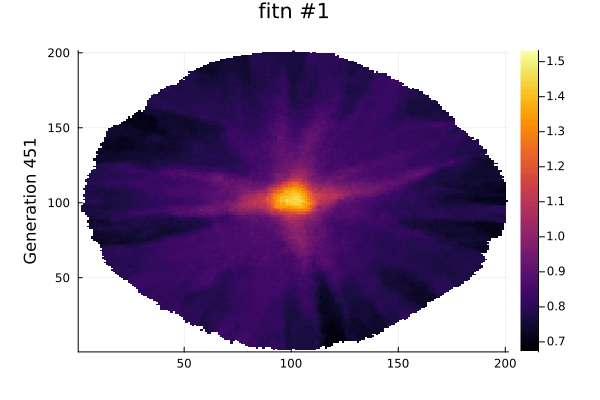

In [4]:
oneD1 = deserialize("data/2d_2.re")
re_heatmap(oneD1, "fitn", oneD1["stats"]["n_gens"]-50, oneD1["stats"]["n_gens"])

In [3]:
function timeseries_mean(ts, n_gens)
    return [mean(ts[i,:]) for i in 1:n_gens]
end

UndefVarError: UndefVarError: `aa` not defined

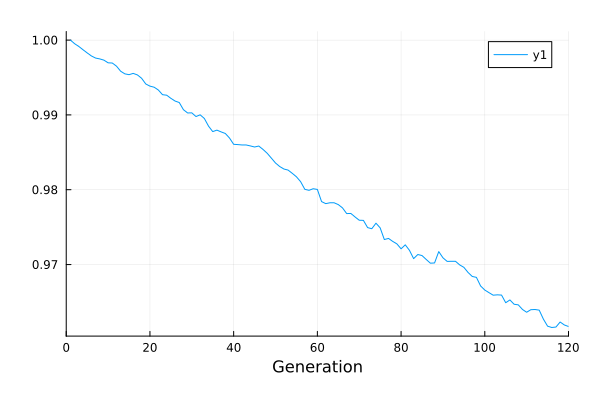

In [8]:
Plots.plot(re_fitnN_frontav_mean,xlabel="Generation",xlims=(0,120))

In [ ]:
Random.seed!(1234)
bb = rangeexp_1d_inf(1,200,1;x_max_burnin=5,x_max_exp=500,data_to_generate="FP",k_capacity=100,r_prolif_rate=2,weightfitn=false,condsel=true,name="2",mut_rate=0.05,migr_rate=0.05,s_sel_coef=0.005)

In [3]:
aa["stats"]

Dict{String, Any} with 18 entries:
  "wlddim"            => 1
  "r_prolif_rate"     => 2
  "max_burnin"        => (5,)
  "name"              => "1"
  "startfill"         => UnitRange{Int64}[1:5]
  "s_sel_coef"        => 0.009
  "n_gens_burnin"     => 5
  "k_capacity"        => 100
  "prop_of_del_muts"  => 0.9
  "migr_rate"         => 0.05
  "max"               => (10,)
  "n_segr_regions"    => 20
  "n_gens"            => 5
  "migr_mode"         => "ort"
  "n_gens_exp"        => 0
  "mut_rate"          => 12
  "max_exp"           => (10,)
  "n_demes_startfill" => 5

In [20]:
aa["fitn"]

500×201×1 Array{Float32, 3}:
[:, :, 1] =
   1.0    1.00005     0.999831  …    0.988876    0.98873     0.987096
   1.0    0.999545    0.999358       0.99109     0.990783    0.991313
   1.0    0.999802    0.999613       0.98985     0.990439    0.992244
   1.0    0.999911    0.999745       0.996143    0.997025    0.996408
   1.0    0.999811    0.999787       0.995514    0.994881    0.995446
 NaN    NaN           1.0       …    0.995098    0.994588    0.996362
 NaN    NaN         NaN              0.994435    0.992851    0.991983
 NaN    NaN         NaN              0.992116    0.991603    0.992392
 NaN    NaN         NaN              0.989953    0.99059     0.990901
 NaN    NaN         NaN              0.987854    0.988624    0.986509
   ⋮                            ⋱                            ⋮
 NaN    NaN         NaN            NaN         NaN         NaN
 NaN    NaN         NaN            NaN         NaN         NaN
 NaN    NaN         NaN            NaN         NaN         NaN
 NaN   

In [42]:
oneD1 = deserialize("data/2d_2.re")
oneD1_fitn_frontav = average_front(oneD1,"fitn";oneside=false)
oneD1_fitn_frontav_mean = average_ts(oneD1_fitn_frontav, oneD1["stats"]["n_gens"])
oneD1_fitn_frontav_meanN = norm_onset_mean(oneD1_fitn_frontav_mean, oneD1["stats"]["n_gens_burnin"]+1)
oneD1nb = deserialize("data/2d_2nb.re")
oneD1nb_fitn_frontav = average_front(oneD1nb,"fitn";oneside=false)
oneD1nb_fitn_frontav_mean = average_ts(oneD1nb_fitn_frontav, oneD1nb["stats"]["n_gens"])

500-element Vector{Float32}:
 1.0
 0.99959123
 0.9991045
 0.998686
 0.99819547
 0.9977471
 0.99737155
 0.9970582
 0.9964945
 0.99615943
 ⋮
 0.8343321
 0.83416736
 0.834013
 0.83381665
 0.8336275
 0.8334487
 0.83328724
 0.83313406
 0.8329693

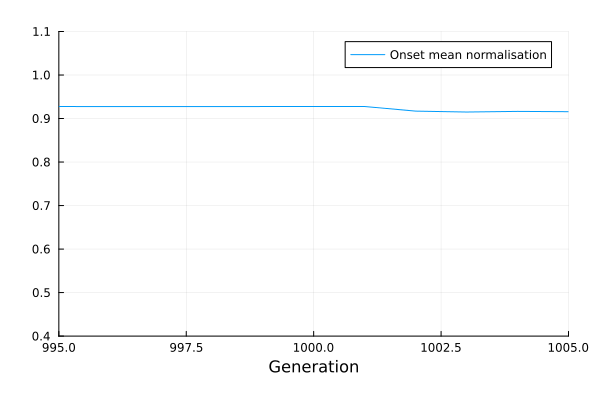

In [43]:
Plots.plot(oneD1_fitn_frontav_mean,label="Onset mean normalisation",xlabel="Generation",ylims=(0.4,1.1),xlims=(995,1005))

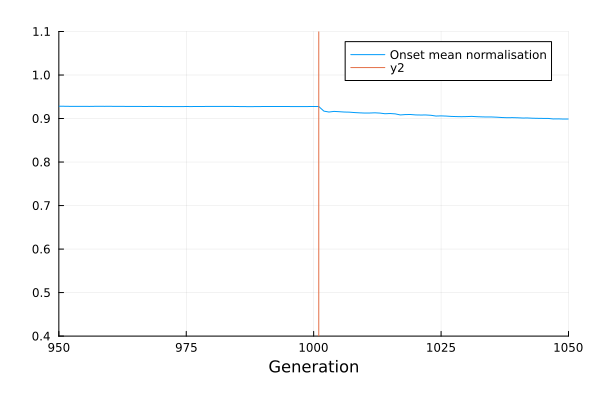

In [22]:
Plots.plot(oneD1_fitn_frontav_mean,label="Onset mean normalisation",xlabel="Generation",ylims=(0.4,1.1),xlims=((oneD1["stats"]["n_gens_burnin"]-50),(oneD1["stats"]["n_gens_burnin"]+50)))
vline!([oneD1["stats"]["n_gens_burnin"]+1])

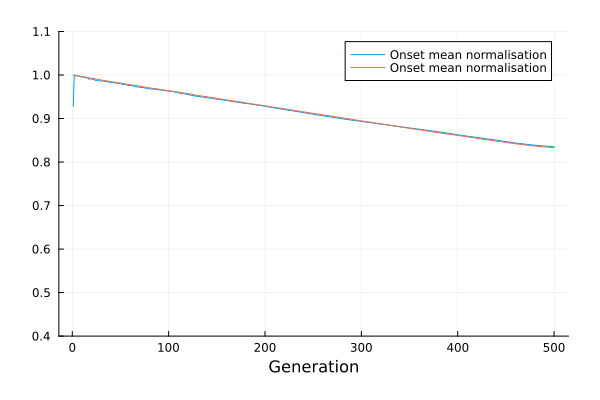

In [44]:
Plots.plot(oneD1_fitn_frontav_meanN[(oneD1["stats"]["n_gens_burnin"]+1):end],label="Onset mean normalisation",xlabel="Generation",ylims=(0.4,1.1))
Plots.plot!(oneD1nb_fitn_frontav_mean,label="Onset mean normalisation",xlabel="Generation",ylims=(0.4,1.1))

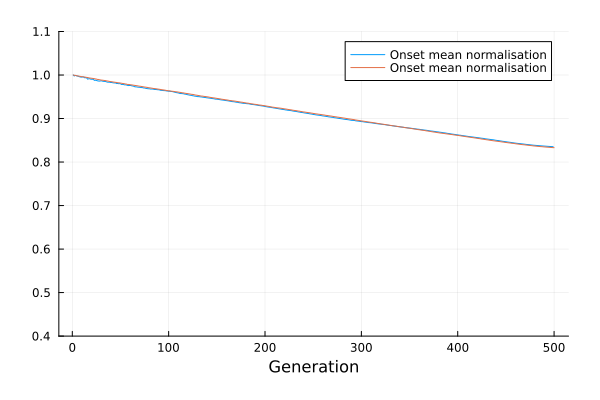

In [45]:
Plots.plot(oneD1_fitn_frontav_meanN[(oneD1["stats"]["n_gens_burnin"]+2):end],label="Onset mean normalisation",xlabel="Generation",ylims=(0.4,1.1))
Plots.plot!(oneD1nb_fitn_frontav_mean,label="Onset mean normalisation",xlabel="Generation",ylims=(0.4,1.1))

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_923ehGPc12.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_923ehGPc12.gif")
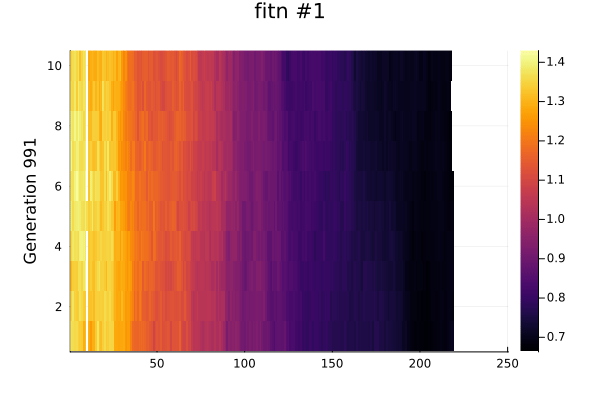

In [10]:
re_heatmap(oneD1,"fitn",450,500)

In [2]:
test = rangeexp_1d_inf(0,300,20;x_max_burnin=5,x_max_exp=500,data_to_generate="F",capacity=100,prolif_rate=2,mut_rate=0.05,migr_rate=0.05,sel_coef=0.005,weightfitn=false,condsel=true,oneside=true,premutate=true)

Dict{String, Any} with 5 entries:
  "pops"  => NaN
  "del"   => NaN
  "fitn"  => Float32[1.0 0.999593 … 0.951472 0.954648; 1.0 0.9995 … 0.948455 0.…
  "stats" => Dict{String, Any}("wlddim"=>1, "max_burnin"=>(5,), "name"=>"2024-0…
  "ben"   => NaN

In [5]:
test_fitn_frontav = average_front(test,"fitn";oneside=true)
test_fitn_frontav_mean = timeseries_mean(test_fitn_frontav, test["stats"]["n_gens"])
test_fitnN = norm_onset_mean(test, "fitn")
test_fitnN_frontav = average_front(test_fitnN, test["stats"]["n_gens"], test["stats"]["max"][1]; oneside=true)
test_fitnN_frontav_mean = timeseries_mean(test_fitnN_frontav, test["stats"]["n_gens"])

300-element Vector{Float32}:
 1.0
 0.99954796
 0.99902165
 0.99864024
 0.9976498
 0.99741554
 0.99684936
 0.9970232
 0.9967777
 0.996256
 ⋮
 0.9007408
 0.89923
 0.89918804
 0.898615
 0.8985041
 0.8994257
 0.897437
 0.897565
 0.896984

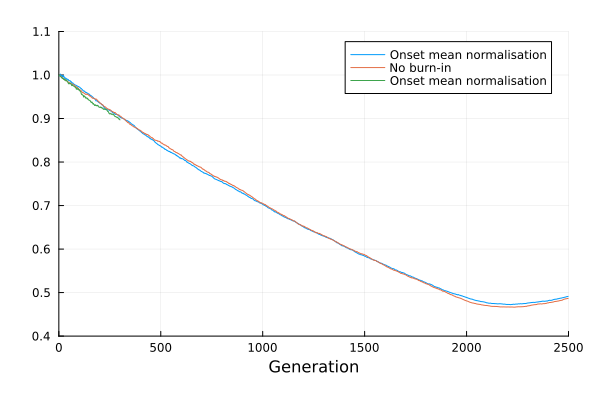

In [10]:
Plots.plot!(test_fitnN_frontav_mean,label="Onset mean normalisation",xlabel="Generation",ylims=(0.4,1.1),xlims=(0,2500))